In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

from utils import get_train_data, make_clf_report

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 100
sns.set_style('ticks', {'axes.grid': False})
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

/tmp/ipykernel_1863549/781861970.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# Fits files

In [15]:
# Read all the single files
X, df = get_train_data(n_files=None)

100%|██████████████████████████████████████████████████████████████| 340/340 [04:21<00:00,  1.30it/s]


In [17]:
# Save what is
file_name = '/home/sjnakoneczny/data/LSST/binaries/X.npy'
np.save(file_name, X)

In [24]:
file_name = '/home/sjnakoneczny/data/LSST/binaries/df.csv'
df.to_csv(file_name, index=False)

# Binaries vs singles

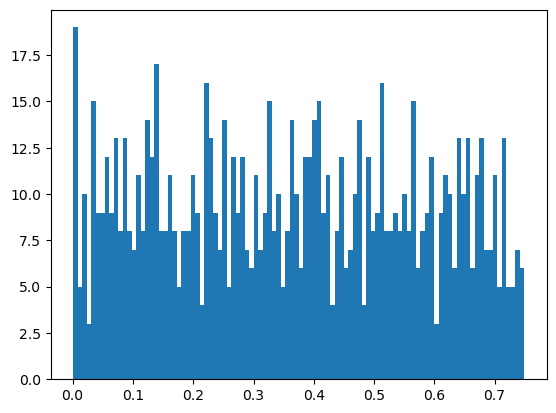

In [215]:
plt.hist(y, bins=100)
plt.show()

In [193]:
idx_false = y < 0.1
idx_true = y > 0.6
X = np.concatenate((X[idx_false], X[idx_true]))
y = np.concatenate((y[idx_false], y[idx_true]))
y = y > 0.6

In [196]:
X_mean_single = np.mean(X[np.where(y == 0)[0]], axis=0)
X_mean_binary = np.mean(X[np.where(y == 1)[0]], axis=0)

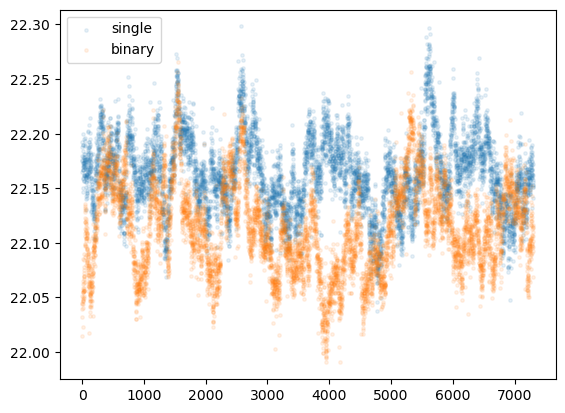

In [162]:
# Original
tmp = range(len(X_mean_single))
plt.scatter(tmp, X_mean_single, s=6, label='single', alpha=0.1)
plt.scatter(tmp, X_mean_binary, s=6, label='binary', alpha=0.1)
plt.legend()

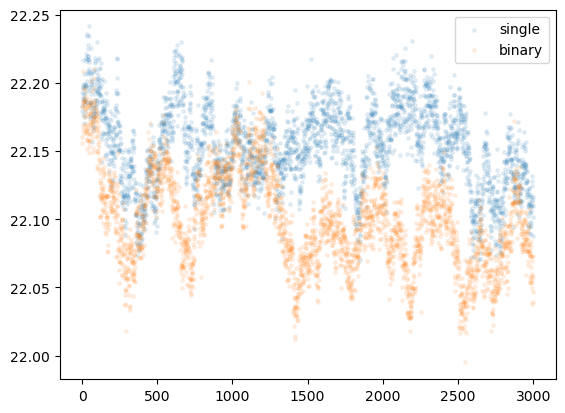

In [171]:
# Random sample (1)
tmp = range(len(X_mean_single))
plt.scatter(tmp, X_mean_single, s=6, label='single', alpha=0.1)
plt.scatter(tmp, X_mean_binary, s=6, label='binary', alpha=0.1)
plt.legend()

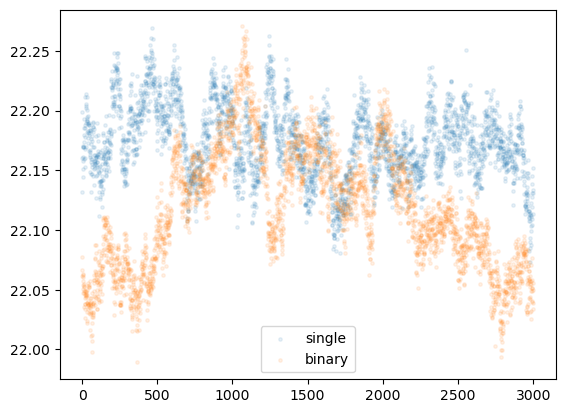

In [166]:
# Random sample (2)
tmp = range(len(X_mean_single))
plt.scatter(tmp, X_mean_single, s=6, label='single', alpha=0.1)
plt.scatter(tmp, X_mean_binary, s=6, label='binary', alpha=0.1)
plt.legend()

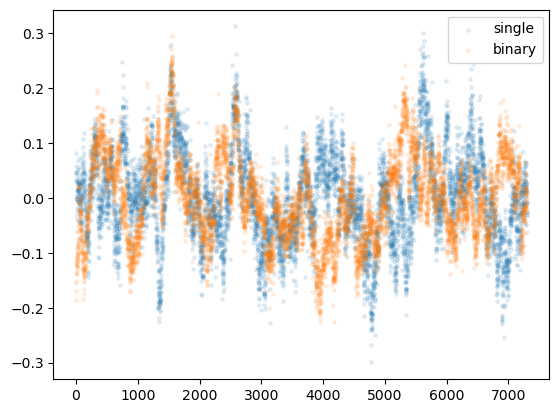

In [181]:
# Standardized
tmp = range(len(X_mean_single))
plt.scatter(tmp, X_mean_single, s=6, label='single', alpha=0.1)
plt.scatter(tmp, X_mean_binary, s=6, label='binary', alpha=0.1)
plt.legend()

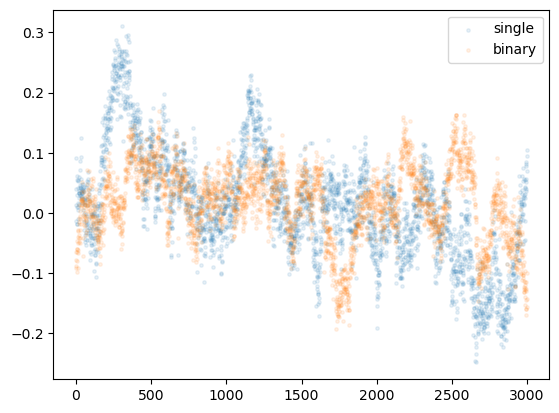

In [185]:
# Standardized random sample (1)
tmp = range(len(X_mean_single))
plt.scatter(tmp, X_mean_single, s=6, label='single', alpha=0.1)
plt.scatter(tmp, X_mean_binary, s=6, label='binary', alpha=0.1)
plt.legend()

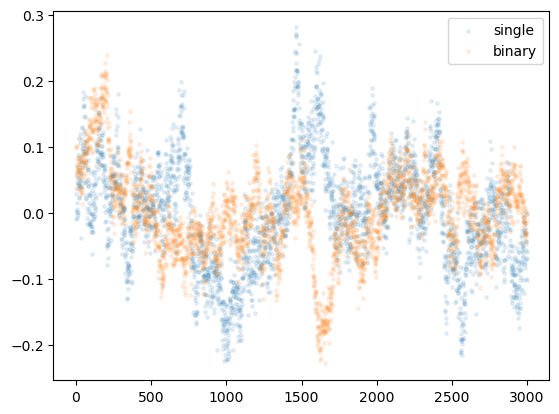

In [191]:
# Standardized random sample (2)
tmp = range(len(X_mean_single))
plt.scatter(tmp, X_mean_single, s=6, label='single', alpha=0.1)
plt.scatter(tmp, X_mean_binary, s=6, label='binary', alpha=0.1)
plt.legend()

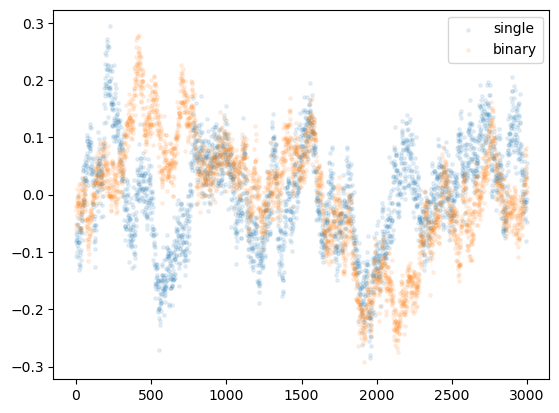

In [197]:
# Standardized random sample (3)
tmp = range(len(X_mean_single))
plt.scatter(tmp, X_mean_single, s=6, label='single', alpha=0.1)
plt.scatter(tmp, X_mean_binary, s=6, label='binary', alpha=0.1)
plt.legend()

# Results

## Classification

In [4]:
_, _, _, y_test = get_train_data()

              precision    recall  f1-score   support

       False       0.67      1.00      0.80     21555
        True       0.00      0.00      0.00     10745

    accuracy                           0.67     32300
   macro avg       0.33      0.50      0.40     32300
weighted avg       0.45      0.67      0.53     32300



/home/sjnakoneczny/tools/anaconda3/envs/py39-ztf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sjnakoneczny/tools/anaconda3/envs/py39-ztf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sjnakoneczny/tools/anaconda3/envs/py39-ztf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

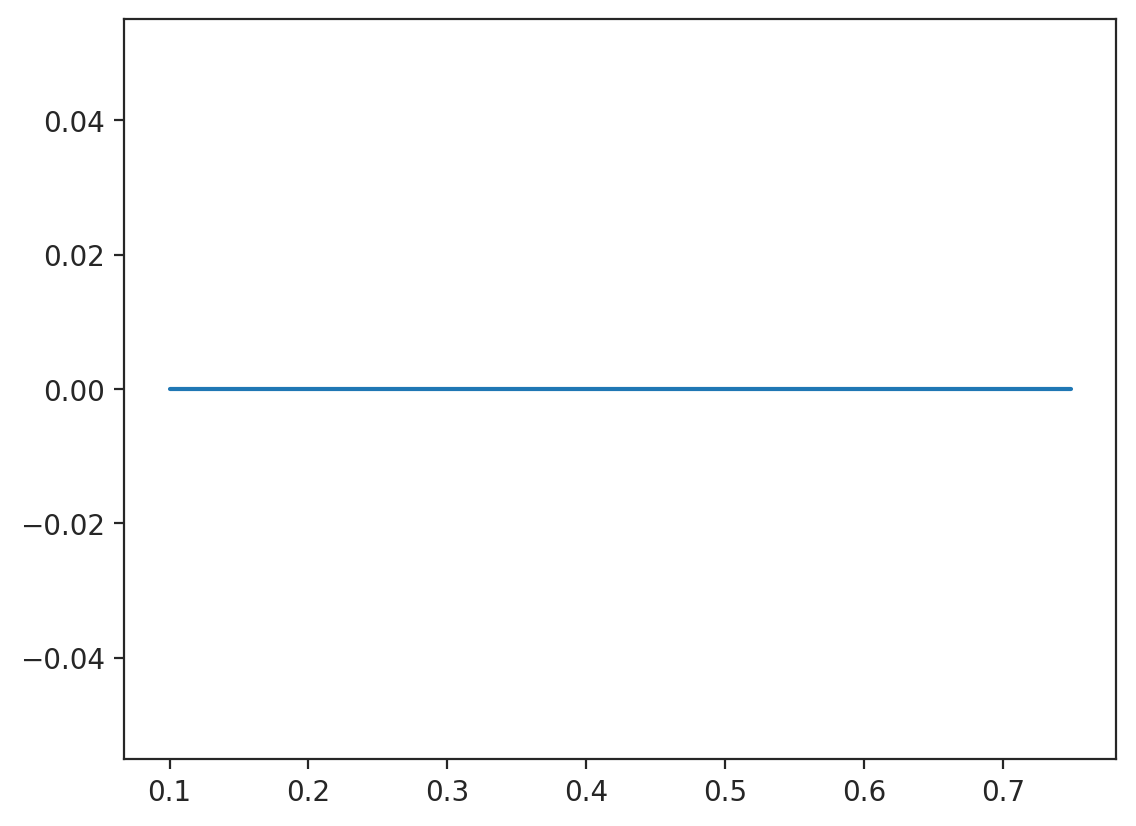

In [14]:
# Constant zero classification
make_clf_report(y_test, [[1, 0]] * len(y_test), df_test)
# print(classification_report(y_test, ))

In [6]:
df = pd.read_csv('/home/sjnakoneczny/data/LSST/binaries/df.csv')
_, df_test = train_test_split(df, test_size=0.1, random_state=3462)

              precision    recall  f1-score   support

       False       0.87      0.91      0.89     21555
        True       0.81      0.72      0.76     10745

    accuracy                           0.85     32300
   macro avg       0.84      0.82      0.83     32300
weighted avg       0.85      0.85      0.85     32300



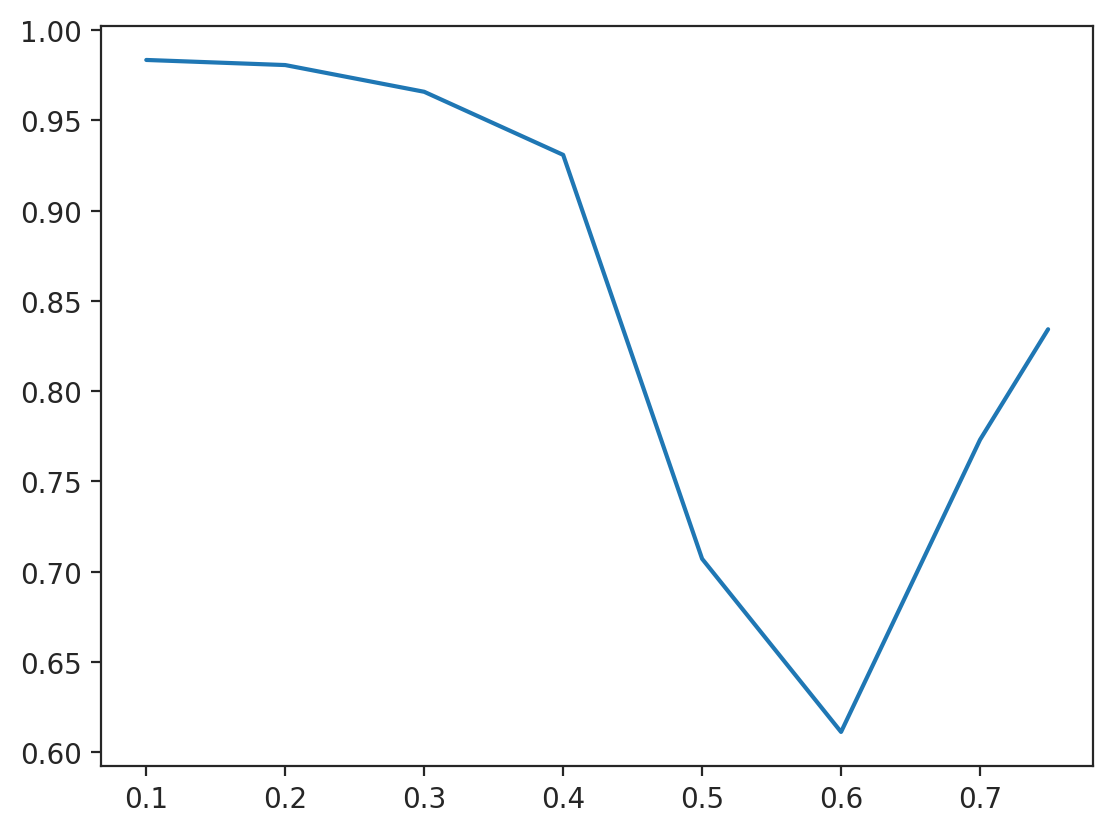

In [22]:
file_name = '/home/sjnakoneczny/workspace/lsst_binaries/outputs/preds/preds_cnn_larger.npy'
make_clf_report(y_test, np.load(file_name), df_test)

## Regression

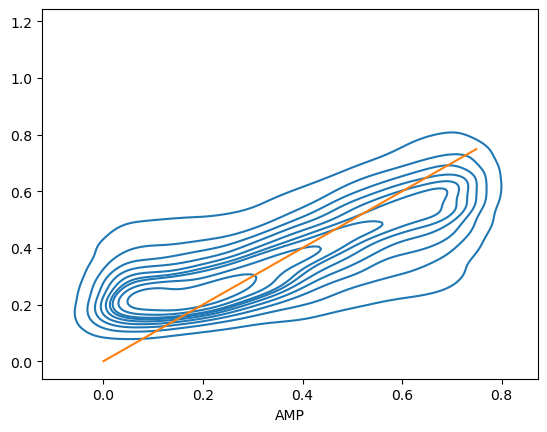

In [20]:
sns.kdeplot(x=y_test, y=y_pred[:, 0])
plt.plot([0, max(y_test)], [0, max(y_test)])

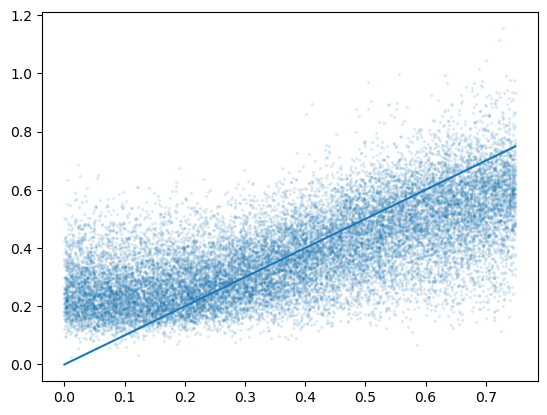

In [18]:
plt.scatter(y_test, y_pred, s=2, alpha=0.1)
plt.plot([0, max(y_test)], [0, max(y_test)])